In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Read in csv (already transformed)
faciltiies_df = pd.read_csv('..//..//data/facilities/All_Facilities.csv')

# Drop columns not need for modeling
df = faciltiies_df.drop(['Description', 'FAC_NO', 'FAC_NAME','FAC_STR_ADDR','FAC_CITY','FAC_PHONE','FAC_ADMIN_NAME','FAC_OPERATED_THIS_YR','FAC_OP_PER_BEGIN_DT','FAC_OP_PER_END_DT','FAC_PAR_CORP_NAME','FAC_PAR_CORP_BUS_ADDR','FAC_PAR_CORP_CITY','FAC_PAR_CORP_STATE','REPT_PREP_NAME','SUBMITTED_DT','LICENSE_NO','LICENSE_EFF_DATE','LICENSE_EXP_DATE','LICENSE_STATUS','FACILITY_LEVEL','REV_REPT_PREP_NAME','REVISED_DT','CORRECTED_DT','ASSEMBLY_DIST','SENATE_DIST','CONGRESS_DIST','CENS_TRACT','MED_SVC_STUDY_AREA','LA_COUNTY_SVC_PLAN_AREA','COUNTY','RURAL_HEALTH_CLINIC'], axis=1)

# Format Categorical Data
df.HEALTH_SVC_AREA = df.HEALTH_SVC_AREA.str[:2]
df.LIC_CAT = df.LIC_CAT == "Community Clinic"
df.FED_QUALIFIED = df.FED_QUALIFIED != "Neither"
df.PRIMARY_NON_ENGLISH_LANG = df.PRIMARY_NON_ENGLISH_LANG == "Spanish"
df.replace(False, 0, inplace=True)

# Drop final coloumns
df.drop(df.iloc[:, 489:551], inplace=True, axis=1)

df.head()

C:\Users\tawnyn\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33,534,568) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,FAC_ZIP,FAC_PAR_CORP_ZIP,LONGITUDE,LATITUDE,HEALTH_SVC_AREA,LIC_CAT,FED_QUALIFIED,COM_SERV_ADULT_DAY_CARE,COM_SERV_CHILD_CARE,COM_SERV_COM_EDUC,...,UTILITIES_OPER_EXP_INC_STATEMENT,PROF_LIABILITY_INSURANCE_OPER_EXP_INC_STATEMENT,OTH_INSURANCE_OPER_EXP_INC_STATEMENT,CONTINUING_ED_OPER_EXP_INC_STATEMENT,INFO_TECH_EHR_OPER_EXP_INC_STATEMENT,ALL_OTH_EXP_INC_STATEMENT,TOT_OPER_EXP_INC_STATEMENT,NET_FROM_OPER_INC_STATEMENT,Target,Label
0,94577,94612,-122.165040,37.704730,05,1.0,0.0,1,0,1,...,73123,88338,0,0,0,4171395,17602967,-1003497,0.519794,1.0
1,94709,0,-122.273185,37.874755,05,1.0,0.0,0,0,0,...,57925,22053,13112,15191,15499,133387,4856964,-5349,0.154921,0.0
2,94621,94607,-122.185760,37.758600,05,1.0,1.0,0,0,0,...,46034,7052,21453,0,227587,368620,4190931,217131,0.173184,0.0
3,94566,94588,-121.873710,37.661450,05,1.0,1.0,0,0,1,...,70859,0,0,1721,50581,595241,1703243,-733980,0.169316,0.0
4,94607,94607,-122.287950,37.804410,05,1.0,1.0,0,0,1,...,118282,12929,104130,0,470978,1929729,19065530,-4516404,0.197962,0.0


In [3]:
# Set features. This will also be used as your x values.
selected_features = df.iloc[:, 0:489]
print(selected_features.shape)

(1161, 489)


In [4]:
selected_features

,FAC_ZIP,FAC_PAR_CORP_ZIP,LONGITUDE,LATITUDE,HEALTH_SVC_AREA,LIC_CAT,FED_QUALIFIED,COM_SERV_ADULT_DAY_CARE,COM_SERV_CHILD_CARE,COM_SERV_COM_EDUC,...,OUTSIDE_PAT_CARE_SERV_OPER_EXP_INC_STATEMENT,RENT_DEPRECIATION_OPER_EXP_INC_STATEMENT,UTILITIES_OPER_EXP_INC_STATEMENT,PROF_LIABILITY_INSURANCE_OPER_EXP_INC_STATEMENT,OTH_INSURANCE_OPER_EXP_INC_STATEMENT,CONTINUING_ED_OPER_EXP_INC_STATEMENT,INFO_TECH_EHR_OPER_EXP_INC_STATEMENT,ALL_OTH_EXP_INC_STATEMENT,TOT_OPER_EXP_INC_STATEMENT,NET_FROM_OPER_INC_STATEMENT
0,94577,94612,-122.165040,37.704730,05,1.0,0.0,1,0,1,...,6086638,1064393,73123,88338,0,0,0,4171395,17602967,-1003497
1,94709,0,-122.273185,37.874755,05,1.0,0.0,0,0,0,...,0,282405,57925,22053,13112,15191,15499,133387,4856964,-5349
2,94621,94607,-122.185760,37.758600,05,1.0,1.0,0,0,0,...,0,140740,46034,7052,21453,0,227587,368620,4190931,217131
3,94566,94588,-121.873710,37.661450,05,1.0,1.0,0,0,1,...,6280,112284,70859,0,0,1721,50581,595241,1703243,-733980
4,94607,94607,-122.287950,37.804410,05,1.0,1.0,0,0,1,...,0,516427,118282,12929,104130,0,470978,1929729,19065530,-4516404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,95961,95991,-121.551076,39.097314,02,1.0,1.0,0,0,0,...,28822,216419,98524,0,6809,2753,0,158198,7600228,738395
1157,95919,95833,-121.281559,39.447018,02,1.0,0.0,0,0,0,...,0,71460,21458,4690,4072,0,0,143548,1632213,-109524
1158,95901,95901,-121.565520,39.118680,02,1.0,1.0,0,0,1,...,34987,619603,146651,9121,73730,10301,457867,1817881,9133370,-709689
1159,95901,95901,-121.594602,39.139861,02,1.0,1.0,0,0,1,...,11102,42437,18992,2889,3080,4699,2620,130274,1415984,802973


In [5]:
X = selected_features
y = df["Label"]
# y = df["Target"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1161, 489) (1161,)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,FAC_ZIP,FAC_PAR_CORP_ZIP,LONGITUDE,LATITUDE,HEALTH_SVC_AREA,LIC_CAT,FED_QUALIFIED,COM_SERV_ADULT_DAY_CARE,COM_SERV_CHILD_CARE,COM_SERV_COM_EDUC,...,OUTSIDE_PAT_CARE_SERV_OPER_EXP_INC_STATEMENT,RENT_DEPRECIATION_OPER_EXP_INC_STATEMENT,UTILITIES_OPER_EXP_INC_STATEMENT,PROF_LIABILITY_INSURANCE_OPER_EXP_INC_STATEMENT,OTH_INSURANCE_OPER_EXP_INC_STATEMENT,CONTINUING_ED_OPER_EXP_INC_STATEMENT,INFO_TECH_EHR_OPER_EXP_INC_STATEMENT,ALL_OTH_EXP_INC_STATEMENT,TOT_OPER_EXP_INC_STATEMENT,NET_FROM_OPER_INC_STATEMENT
215,90022,90040,-118.153590,34.019660,11,1.0,1.0,0,0,1,...,1338558,1246772,251104,16611,92037,40250,999116,13290252,38807705,-7410476
319,90023,90040,-118.187860,34.023950,11,1.0,1.0,0,0,1,...,976140,534783,123130,8395,56254,15449,451176,5694855,18294898,-2088378
493,90255,90040,-118.238960,33.989120,11,1.0,1.0,1,0,0,...,1456550,106916,16936,215,18629,313,30304,1015248,3656116,1066956
1119,93257,93274,-119.196700,36.092670,09,1.0,1.0,0,0,1,...,23970,30137,13795,2189,0,2794,4575,143059,1533888,297963
464,90005,90005,-118.303146,34.063066,11,1.0,1.0,0,0,0,...,0,26024,3525,1104,0,4877,8458,48242,478347,360932


In [7]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
# Create the SVC Model
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.43333333333333335
Testing Data Score: 0.436426116838488


In [10]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid2 = GridSearchCV(model, param_grid, verbose=3)

In [11]:
# Train the model with GridSearch
grid2.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.718, total=   0.2s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s



[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.799, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.799, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.770, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.753, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.718, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.799, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.799, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.770, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] .

[CV] .................. C=50, gamma=0.0001, score=0.805, total=   0.3s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.822, total=   0.3s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.856, total=   0.3s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.839, total=   0.3s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.822, total=   0.3s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.805, total=   0.3s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.822, total=   0.3s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   16.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [12]:
print(grid2.best_params_)
print(grid2.best_score_)

{'C': 50, 'gamma': 0.0001}
0.8287356321839081


In [13]:
correlations_df = df[['FAC_ZIP','PHYSICIAN_ENC_BY_PRIM_CARE_PROVIDER','PHYSICIAN_ASSIST_ENC_BY_PRIM_CARE_PROVIDER','FAM_NURSE_ENC_BY_PRIM_CARE_PROVIDER','VISIT_NURSE_ENC_BY_PRIM_CARE_PROVIDER','PSYCHIATRIST_ENC_BY_PRIM_CARE_PROVIDER','MENTAL_DISORDERS_ENC','SYMPTOMS_SIGNS_ILLDEFINED_CONDITIONS_ENC','NET_FROM_OPER_INC_STATEMENT','Target','Label']].astype(float)

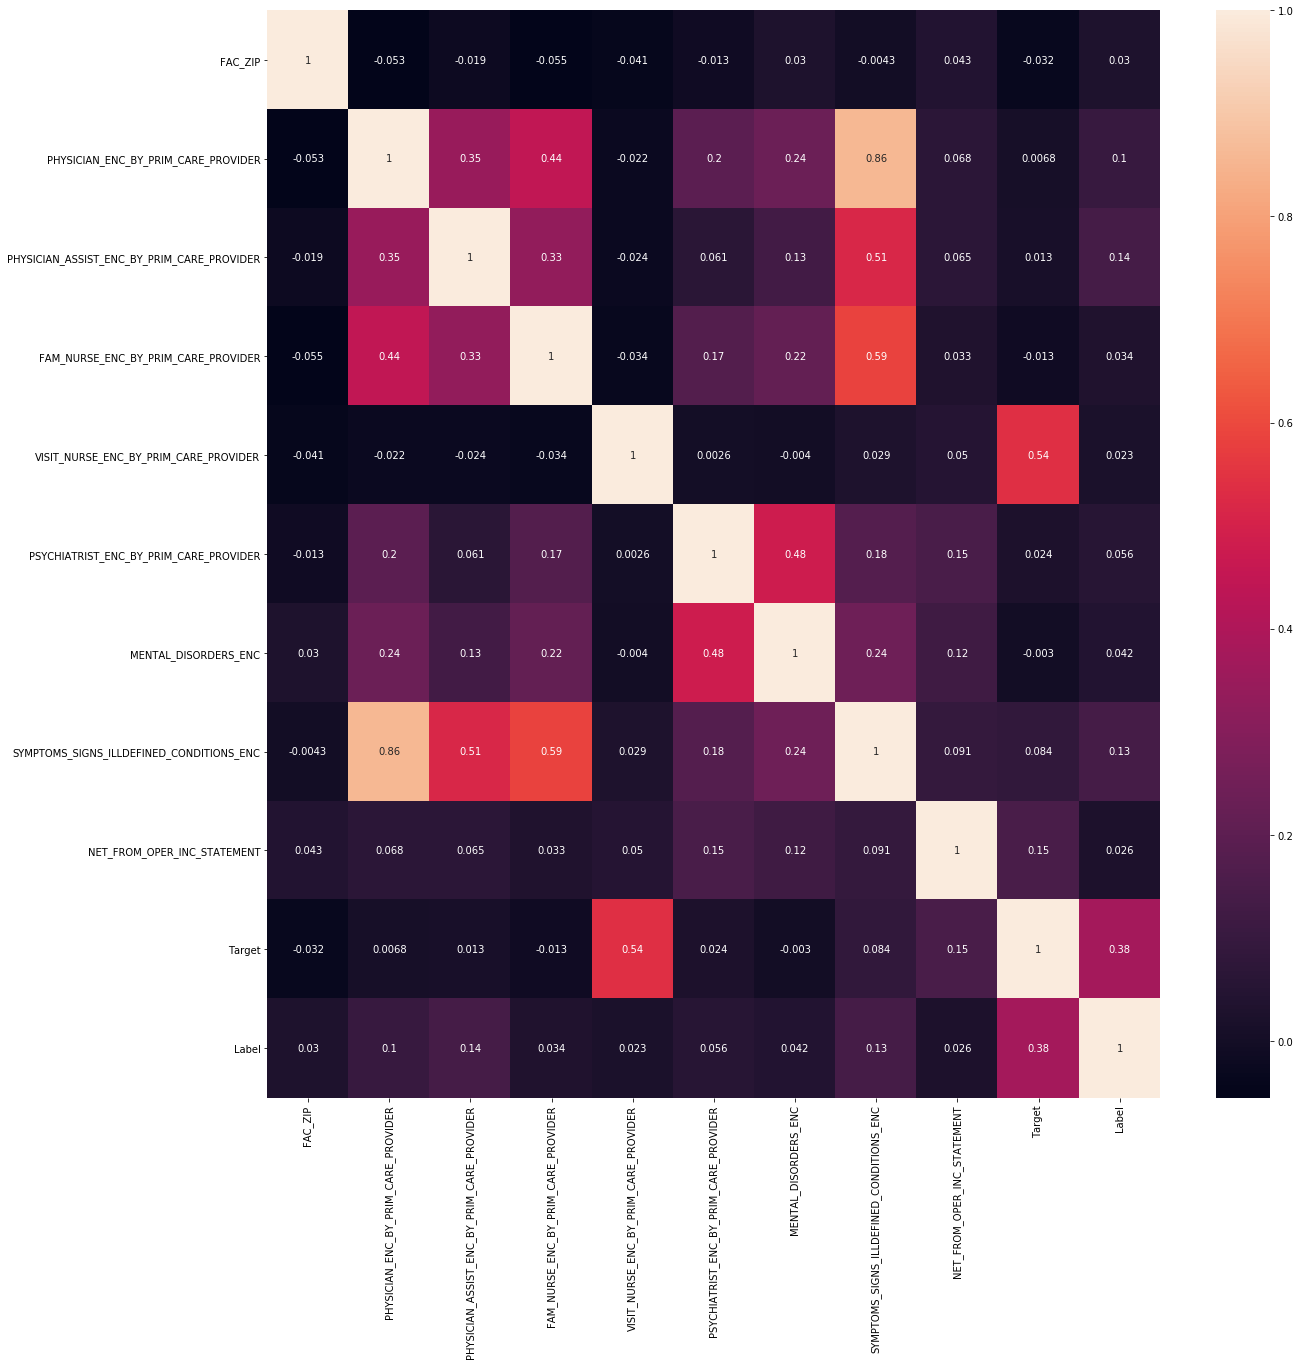

In [14]:
correlations = correlations_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)